### Import modules

In [63]:
import pathlib
import ujson as json
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Init variabels

In [136]:
ROOT_DIR = "/dynga/uninett/data/"
FILE_PATTERN = "**/*events*.log"
GAP_LIST_LENGTH = 10000


### Read gaps from event-files

In [137]:
gap_list = []
root_path = pathlib.Path(ROOT_DIR)
loop0_done = False

for i, path in enumerate(root_path.rglob(pattern=FILE_PATTERN), 1):

    if loop0_done:
        break
        
    if (i % 25) == 0:
        print(f"{i}: {path}")
    
    with path.open() as f:
        for j, line in enumerate(f, 1):

            #if (j % 10000) == 0:
            #    print(f"\t{j}: {None}")
            
            if '"gap"' in line:
                
                try:
                    gap_list.append(json.loads(line))
                except Exception as e:
                    print(f"\t[error] file:{i}, line:{j}: {e}")
                
                if len(gap_list) >= GAP_LIST_LENGTH:
                    loop0_done = True
                    break

# print(len(gap_list))
# print(gap_list[:3])

25: /dynga/uninett/data/ytelse-osl.uninett.no/2021-02-15/uninett-events-00:00:07.log
50: /dynga/uninett/data/ytelse-osl.uninett.no/2021-01-22/uninett-events-00:00:07.log
75: /dynga/uninett/data/ytelse-osl.uninett.no/2020-12-29/uninett-events-00:00:07.log
100: /dynga/uninett/data/ytelse-osl.uninett.no/2020-12-05/uninett-events-00:00:07.log
125: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-10/uninett-events-00:00:07.log
150: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-07:22:07.log
175: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-06:57:07.log
200: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-06:32:07.log
225: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-06:07:08.log
250: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-05:42:07.log
275: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-05:17:07.log
300: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05

In [205]:
print(len(gap_list))
print(gap_list[0])

10000
{'@date': '2021-03-04T00:02:27.822', 'dTTL': 0, 'datetime': '2021-03-04T00:02:27.822', 'event_type': 'gap', 'from': 'borre-mp.usn.no', 'from_adr': '128.39.19.150', 'h_ddelay': 0.079, 'h_delay': 1.128, 'h_jit': 0.029, 'h_min_d': 1.049, 'h_n': 50, 'h_slope_10': 0, 'h_slope_20': 0, 'h_slope_30': 0, 'h_slope_40': 0, 'h_slope_50': 0.001, 'overlap': 1, 'rdelay': [0.10228157043457, 0.0791549682617188, 0.0462532043457031, 0.0443458557128906, 0.107288360595703, 0.0422000885009766, 0.0462532043457031, 0.080108642578125, 0.107049942016602, 0.0832080841064453, 0.110387802124023, 0.0622272491455078, 0.0851154327392578, 0.0841617584228516, 0.0782012939453125, 0.0603199005126953, 0.0963211059570312, 0.0982284545898438, 0.0593662261962891, 0.107288360595703, 0.0841617584228516, 0.0493526458740234, 0.0803470611572266, 0.0760555267333984, 0.0500679016113281, 0.130176544189453, 0.0772476196289062, 0.100374221801758, 0.12516975402832, 0.0631809234619141, 0.0691413879394531, 0.116109848022461, 0.0972

#### Reduce columns

In [217]:
selected_features = {
    # key: 0 or 1 to select
    'dTTL': 1,
    'h_ddelay': 1,
    'h_delay': 1,
    'h_jit': 1,
    'h_min_d': 1,
    'h_slope_10': 1,
    'h_slope_50': 1,
    'tloss': 1,
    't_ddelay': 1,
    't_delay': 1,
    't_jit': 1,
    't_min_d': 1,
    't_slope_10': 1,
    't_slope_10': 1,
    't_slope_50': 1,
}
reduced_gap_list = [ { k:v for k,v in gap.items() if selected_features.get(k) } for gap in gap_list]
print(len(reduced_gap_list))
print(reduced_gap_list[:1])

10000
[{'dTTL': 0, 'h_ddelay': 0.079, 'h_delay': 1.128, 'h_jit': 0.029, 'h_min_d': 1.049, 'h_slope_10': 0, 'h_slope_50': 0.001, 't_ddelay': 0.81, 't_delay': 1.859, 't_jit': 0.017, 't_min_d': 1.049, 't_slope_10': 0, 't_slope_50': 0, 'tloss': 320}]


#### Transform list of gap-objects to numpy array of features
list[object] -> array-like


In [218]:
vectorizer = DictVectorizer(sparse=False)

gap_array = vectorizer.fit_transform(reduced_gap_list)
print(len(gap_array))
print(gap_array[:10])

10000
[[ 0.00000e+00  7.90000e-02  1.12800e+00  2.90000e-02  1.04900e+00
   0.00000e+00  1.00000e-03  8.10000e-01  1.85900e+00  1.70000e-02
   1.04900e+00  0.00000e+00  0.00000e+00  3.20000e+02]
 [ 0.00000e+00  5.60000e-02  5.06000e-01  2.40000e-02  4.50000e-01
   0.00000e+00  0.00000e+00  1.84400e+00  2.29400e+00  2.60000e-02
   4.50000e-01  0.00000e+00  0.00000e+00  4.00990e+03]
 [ 0.00000e+00  4.20000e-02  7.58000e-01  1.60000e-02  7.16000e-01
   0.00000e+00  0.00000e+00  1.84800e+00  2.56400e+00  2.10000e-02
   7.16000e-01  0.00000e+00  0.00000e+00  4.01000e+03]
 [ 0.00000e+00  1.49600e+00  1.89900e+00  1.54600e+00  4.03000e-01
   1.50000e-02  3.26000e-01  4.34000e-01  8.37000e-01  5.34000e-01
   4.03000e-01 -5.90000e-02 -2.00000e-03  5.00000e+01]
 [ 0.00000e+00  7.20000e-02  1.82000e+00  1.90000e-02  1.74800e+00
   0.00000e+00  0.00000e+00  2.70000e-02  1.22200e+00  1.70000e-02
   1.19500e+00  0.00000e+00  0.00000e+00  4.00000e+02]
 [ 0.00000e+00  2.46000e-01  7.18500e+00  7.40000

### analyze gap_list

[[   0.   320. ]
 [   0.  4009.9]]
Computing label assignment and total inertia
[320]
[0.001, 0, 0, 0.326, 0, -0.001, 0, 1.918, 0, -0.89]


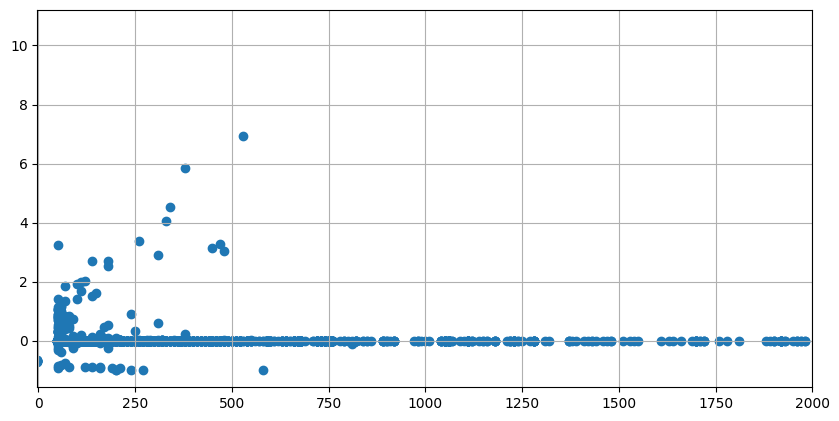

In [172]:
# feature extraction / normalization / scaling / vectorization

print(gaps_prepared[:2])

# partial_fit(gaps_prepared)
#kmeans.partial_fit(X=gaps_prepared)

ss = sklearn.metrics.silhouette_score(X=gaps_prepared, labels=kmeans.predict(gaps_prepared))
# print(f"silhouette score: {ss}")

tloss = [ gap['tloss'] for gap in gap_list]
hslopes10 = [ gap['h_slope_50'] for gap in gap_list ]
tslopes10 = [ gap['t_slope_10'] for gap in gap_list ]
hjit = [ gap['h_jit'] for gap in gap_list ]

x = tloss
y = hslopes10

print(x[:1])
print(y[:10])

# plt.scatter(data=gap_list)
# plt.plot(xlabel='tloss', ylabel='h_slope_10', marker='o', data=gap_list)
# plt.plot(data=gap_list)
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(x, y)
plt.xlim(min(x), 2000)
# plt.ylim(0, 2)
# plt.set(xlabel='tloss', ylabel='h_slope_10', title='About as simple as it gets, folks')
plt.grid()
plt.show()



### Independent block
Read and buffer gaps from raw logs  
batch fit kmeans

In [60]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction import DictVectorizer


FEATURES = ['tloss', 'h_slope_10']

v = DictVectorizer(sparse=False)
v.fit( [{key:0 for key in FEATURES}] )

CLUSTERS = 3
BATCH_SIZE = 2000
gap_buffer = []
root_path = pathlib.Path("/dynga/uninett/data/")

kmeans = MiniBatchKMeans(verbose=1, batch_size=BATCH_SIZE)

def file_handler(i:int, path: pathlib.Path) -> bool:
    
loop0_done = False
for i, path in enumerate(root_path.rglob(pattern="**/*event*.log"), 1):
    
    if loop0_done:
        break
        
    # if len(gap_list) > 20000:
        #break
        
    if (i % 20) == 0:
        print(f"{i}: {path} gap_list={len(gap_list)}")
        
    if i > 400000:
        break
    
    with path.open() as f:
        for j, line in enumerate(f, 1):
            
            #if (j % 10000) == 0:
                # print(f"\t{j}: {None}")
            
            if '"gap"' in line:
                try:
                    gap_buffer.append(json.loads(line))
                except:
                    pass
            
                if len(gap_buffer) >= BATCH_SIZE:
                    # print(f"file {i}, line {j} gap_list has been reset")

                    # feature extraction / normalization / scaling / vectorization
                    gaps_prepared = v.transform({key:record[key] for key in FEATURES} for record in gap_buffer)

                    # partial_fit(gaps_prepared)
                    kmeans.partial_fit(X=gaps_prepared)
                    
                    ss = sklearn.metrics.silhouette_score(X=gaps_prepared, labels=kmeans.predict(gaps_prepared))
                    print(f"silhouette score: {ss}")

                    gap_buffer = []
                    loop0_done = True


# print(len(gap_list))
# print(gap_list[:3])

20: /dynga/uninett/data/ytelse-osl.uninett.no/2021-02-20/uninett-events-00:00:07.log gap_list=49
40: /dynga/uninett/data/ytelse-osl.uninett.no/2021-02-01/uninett-events-00:00:07.log gap_list=99
60: /dynga/uninett/data/ytelse-osl.uninett.no/2021-01-13/uninett-events-00:00:07.log gap_list=143
80: /dynga/uninett/data/ytelse-osl.uninett.no/2020-12-24/uninett-events-00:00:07.log gap_list=185
100: /dynga/uninett/data/ytelse-osl.uninett.no/2020-12-05/uninett-events-00:00:07.log gap_list=258
120: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-15/uninett-events-00:00:07.log gap_list=824
140: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-07:32:08.log gap_list=1238
160: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-07:12:07.log gap_list=1238
180: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-06:52:07.log gap_list=1238
200: /dynga/uninett/data/ytelse-osl.uninett.no/2020-11-05/uninett-events-06:32:07.log gap_list=1238
220: /dynga/

In [61]:
print(len(gap_list))

2000
